In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Bayesian Estimation in Pattern Classification

###  Bayesian Estimation

In Bayesian learning, we treat the parameter vector $ \theta $ as a random variable, unlike the maximum likelihood approach, where $ \theta $ is considered fixed. Training data allows us to update a prior distribution into a posterior probability density.

### The Class-Conditional Densities

The core of Bayesian classification is computing the posterior probabilities $ P(\omega_i | x) $. Bayes' theorem provides:

$$
P(\omega_i | x) = \frac{p(x | \omega_i) P(\omega_i)}{\sum_{j=1}^{c} p(x | \omega_j) P(\omega_j)}
$$

When the prior probabilities $ P(\omega_i) $ and the class-conditional densities $ p(x | \omega_i) $ are unknown, we use available information, including training samples $ D $, to estimate $ P(\omega_i | x, D) $. Given the training data $ D $, Bayes' theorem adapts to:

$$
P(\omega_i | x, D) = \frac{p(x | \omega_i, D) P(\omega_i | D)}{\sum_{j=1}^{c} p(x | \omega_j, D) P(\omega_j | D)}
$$

Assuming known prior probabilities $ P(\omega_i) $, we simplify:

$$
P(\omega_i | x, D) = \frac{p(x | \omega_i, D) P(\omega_i)}{\sum_{j=1}^{c} p(x | \omega_j, D) P(\omega_j)}
$$

Each class can be treated independently, allowing us to rewrite:

$$
P(\omega_i | x, D) = \frac{p(x | \omega_i, D_i) P(\omega_i)}{\sum_{j=1}^{c} p(x | \omega_j, D_j) P(\omega_j)}
$$

### The Parameter Distribution

We assume $ p(x) $ has a known parametric form but an unknown parameter vector $ \theta $. Thus, $ p(x | \theta) $ is completely specified, and any prior knowledge is embedded in $ p(\theta) $. The observation of samples updates this prior to the posterior density $ p(\theta | D) $, ideally sharply peaked around the true $ \theta $.

To compute $ p(x | D) $, we integrate over the parameter space:

$$
p(x | D) = \int p(x, \theta | D) \, d\theta
$$

Given that:

$$
p(x, \theta | D) = p(x | \theta, D) p(\theta | D)
$$

and the independence between $ x $ and the training samples $ D $:

$$
p(x | \theta, D) = p(x | \theta)
$$

The expression simplifies to:

$$
p(x | D) = \int p(x | \theta) p(\theta | D) \, d\theta
$$

If $ p(\theta | D) $ is sharply peaked around $ \hat{\theta} $, then:

$$
p(x | D) \approx p(x | \hat{\theta})
$$

This approximation holds under smoothness conditions for $ p(x | \theta) $, where the contribution from the tails of the integral is negligible. In cases of higher uncertainty for $ \theta $, averaging $ p(x | \theta) $ over all possible $ \theta $ is necessary. 

The integration in practice is often done numerically, for example, using Monte-Carlo simulations.


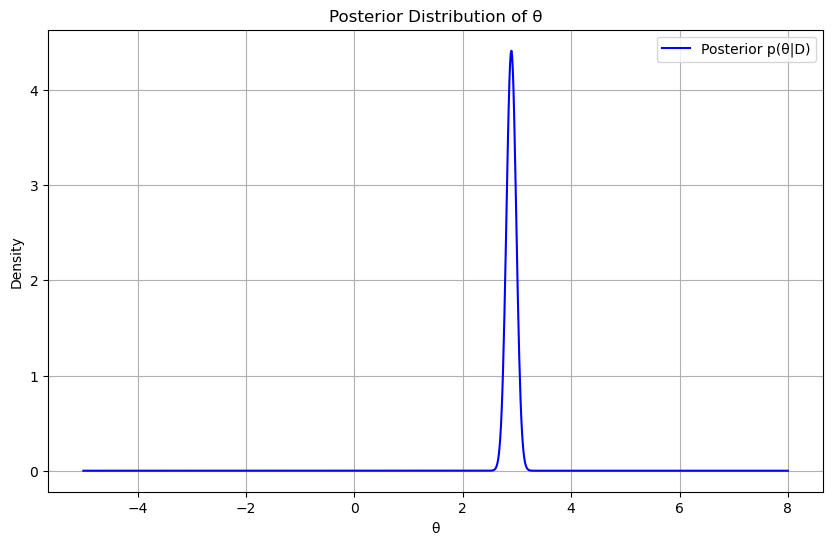

Estimated p(x=2.5 | D) ≈ 0.3676


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate training data D
np.random.seed(42)
n_samples = 100
true_theta = 3.0  # True parameter for demonstration
D = np.random.normal(loc=true_theta, scale=1.0, size=n_samples)

# Prior distribution p(θ) assumed to be Gaussian with mean 0 and variance 1
prior_mean = 0
prior_std = 1

# Posterior p(θ|D) calculated using Bayes' rule
theta_range = np.linspace(-5, 8, 1000)  # Range of θ values to sample
posterior = norm.pdf(theta_range, loc=np.mean(D), scale=np.std(D) / np.sqrt(n_samples))

# Normalizing the posterior
posterior /= np.trapz(posterior, theta_range)  # Ensure it's a proper density

# Compute p(x|D) for a given new data point x
x_new = 2.5
p_x_given_D = np.trapz(norm.pdf(x_new, loc=theta_range, scale=1.0) * posterior, theta_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(theta_range, posterior, label='Posterior p(θ|D)', color='blue')
plt.title('Posterior Distribution of θ')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated p(x={x_new} | D) ≈ {p_x_given_D:.4f}")


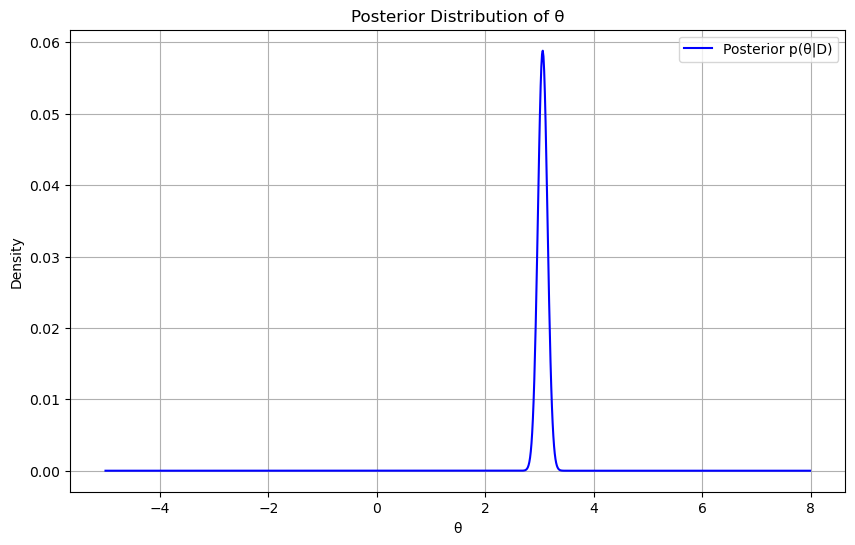

Estimated p(x=2.5 | D) ≈ 0.0044


In [2]:
import random
import matplotlib.pyplot as plt
from math import exp, sqrt, pi

# Generate training data D (Gaussian distribution)
random.seed(42)
n_samples = 100
true_theta = 3.0  # True parameter
D = [random.gauss(true_theta, 1.0) for _ in range(n_samples)]

# Define a function for the Gaussian probability density function
def gaussian_pdf(x, mean, std_dev):
    return (1 / (std_dev * sqrt(2 * pi))) * exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Define prior distribution p(θ)
prior_mean = 0
prior_std = 1

# Generate θ range manually
theta_range = [-5 + 0.013 * i for i in range(1000)]  # Approximate range with small step size

# Compute the posterior p(θ|D)
posterior = []
mean_D = sum(D) / len(D)
std_D = sqrt(sum((x - mean_D) ** 2 for x in D) / (len(D) - 1)) / sqrt(n_samples)

for theta in theta_range:
    posterior_value = gaussian_pdf(mean_D, theta, std_D)
    posterior.append(posterior_value)

# Normalize the posterior
posterior_sum = sum(posterior)
posterior = [p / posterior_sum for p in posterior]

# Compute p(x|D) for a new data point x_new
x_new = 2.5
p_x_given_D = sum(gaussian_pdf(x_new, theta, 1.0) * p for theta, p in zip(theta_range, posterior)) * 0.013

# Plot the posterior distribution
plt.figure(figsize=(10, 6))
plt.plot(theta_range, posterior, label='Posterior p(θ|D)', color='blue')
plt.title('Posterior Distribution of θ')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated p(x={x_new} | D) ≈ {p_x_given_D:.4f}")


## Bayesian Parameter Estimation: Gaussian Case

In this section, we use Bayesian estimation techniques to calculate the a posteriori density $ p(\theta | D) $ and the desired probability density $ p(x | D) $ for the case where $ p(x | \mu) \sim \mathcal{N}(\mu, \Sigma) $.

## The Univariate Case: $ p(\mu | D) $

Consider the case where $ \mu $ is the only unknown parameter. For simplicity, we first treat the univariate case, i.e.,

$$
p(x | \mu) \sim \mathcal{N}(\mu, \sigma^2),
$$

where the only unknown quantity is the mean $ \mu $. We assume that whatever prior knowledge we have about $ \mu $ can be expressed by a known prior density $ p(\mu) $. Later, we shall make the further assumption that

$$
p(\mu) \sim \mathcal{N}(\mu_0, \sigma_0^2),
$$

where both $ \mu_0 $ and $ \sigma_0^2 $ are known. Roughly speaking, $ \mu_0 $ represents our best a priori guess for $ \mu $, and $ \sigma_0^2 $ measures our uncertainty about this guess.

### The Assumption

The crucial assumption is not that the prior distribution for $ \mu $ is normal, but that it is known. Once a value is drawn for $ \mu $ from a population governed by the probability law $ p(\mu) $, it becomes the true value of $ \mu $ and completely determines the density for $ x $. Suppose $ n $ samples $ x_1, \ldots, x_n $ are independently drawn from the resulting population. Let $ D = \{x_1, \ldots, x_n\} $. Using Bayes’ formula, we obtain:

$$
p(\mu | D) = \frac{p(D | \mu)p(\mu)}{\int p(D | \mu)p(\mu) \, d\mu} = \alpha \prod_{k=1}^{n} p(x_k | \mu) p(\mu),
$$

where $ \alpha $ is a normalization factor that depends on $ D $ but is independent of $ \mu $. This equation shows how the observation of a set of training samples affects our belief about the true value of $ \mu $; it relates the prior density $ p(\mu) $ to the posterior density $ p(\mu | D) $.

Since $ p(x_k | \mu) \sim \mathcal{N}(\mu, \sigma^2) $ and $ p(\mu) \sim \mathcal{N}(\mu_0, \sigma_0^2) $, we have:

$$
p(\mu | D) = \alpha \exp \left( -\sum_{k=1}^{n} \frac{(x_k - \mu)^2}{2\sigma^2} \right) \exp \left( -\frac{(\mu - \mu_0)^2}{2\sigma_0^2} \right).
$$

This can be simplified to:

$$
p(\mu | D) = \alpha' \exp \left( -\frac{1}{2} \left[ \left(\sum_{k=1}^{n} \frac{1}{\sigma^2}\right) \mu^2 - 2\left(\sum_{k=1}^{n} \frac{x_k}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu \right] \right),
$$

where constants independent of $ \mu $ are absorbed into $ \alpha $ and $ \alpha' $.

### Resulting Posterior Distribution

By matching the coefficients with the generic Gaussian form

$$
p(\mu | D) \sim \mathcal{N}(\mu_n, \sigma_n^2),
$$

we find:

$$
\frac{1}{\sigma_n^2} = \frac{n}{\sigma^2} + \frac{1}{\sigma_0^2},
$$

$$
\mu_n = \frac{n \bar{x}_n}{\sigma^2} + \frac{\mu_0}{\sigma_0^2} \cdot \sigma_n^2,
$$

where:

$$
\bar{x}_n = \frac{1}{n} \sum_{k=1}^{n} x_k.
$$

### Final Expressions

Solving for $ \mu_n $ and $ \sigma_n^2 $ explicitly gives:

$$
\mu_n = \frac{n\sigma_0^2 \bar{x}_n + \sigma^2 \mu_0}{n\sigma_0^2 + \sigma^2},
$$

$$
\sigma_n^2 = \frac{\sigma_0^2 \sigma^2}{n\sigma_0^2 + \sigma^2}.
$$

These equations illustrate how prior information is combined with empirical observations to derive the posterior density $ p(\mu | D) $. The posterior mean $ \mu_n $ represents the best estimate of $ \mu $ after observing $ n $ samples, and $ \sigma_n^2 $ quantifies the remaining uncertainty. As $ n $ increases, $ \sigma_n^2 $ decreases, approaching $ \frac{\sigma^2}{n} $ as $ n \rightarrow \infty $. This behavior is characteristic of Bayesian learning.


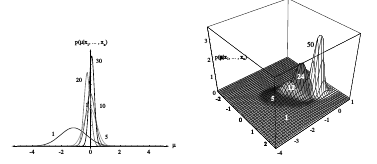

Fig.2: Bayesian learning of the mean of normal distributions in one and two dimensions. The posterior distribution estimates are labelled by the number of training samples used in the estimation.

In [3]:
# Define a function to compute the posterior mean and variance
def bayesian_parameter_estimation(x_data, mu_0, sigma_0_sq, sigma_sq):
    """
    Computes the posterior mean and variance for Bayesian parameter estimation
    in the univariate Gaussian case.

    Parameters:
    - x_data: List of observed data points (samples).
    - mu_0: Prior mean (mu_0).
    - sigma_0_sq: Prior variance (sigma_0^2).
    - sigma_sq: Variance of the likelihood (sigma^2).

    Returns:
    - mu_n: Posterior mean (mu_n).
    - sigma_n_sq: Posterior variance (sigma_n^2).
    """
    n = len(x_data)  # Number of observed samples
    if n == 0:
        raise ValueError("No data provided.")
    
    # Calculate the sample mean of the observed data
    x_bar_n = sum(x_data) / n

    # Calculate the posterior variance
    sigma_n_sq = 1 / (n / sigma_sq + 1 / sigma_0_sq)
    
    # Calculate the posterior mean
    mu_n = sigma_n_sq * (n * x_bar_n / sigma_sq + mu_0 / sigma_0_sq)

    return mu_n, sigma_n_sq


# Example usage
if __name__ == "__main__":
    # Sample data points (observations)
    observed_data = [5.0, 4.8, 5.2, 5.1, 5.3]  # Replace with your own data
    
    # Prior parameters
    mu_0 = 4.0          # Prior mean
    sigma_0_sq = 1.0    # Prior variance
    sigma_sq = 0.5      # Variance of the likelihood

    # Compute posterior mean and variance
    mu_n, sigma_n_sq = bayesian_parameter_estimation(observed_data, mu_0, sigma_0_sq, sigma_sq)

    # Print results
    print(f"Posterior Mean (mu_n): {mu_n:.4f}")
    print(f"Posterior Variance (sigma_n^2): {sigma_n_sq:.4f}")


Posterior Mean (mu_n): 4.9818
Posterior Variance (sigma_n^2): 0.0909


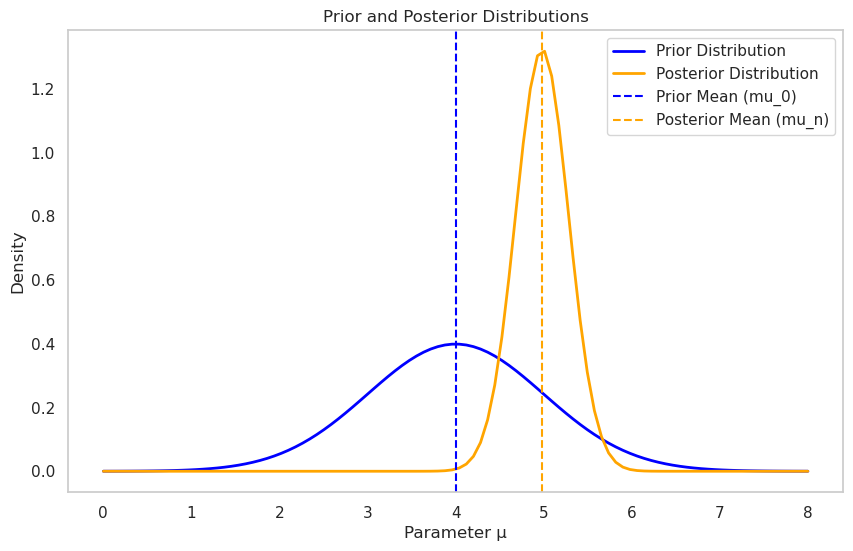

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def bayesian_parameter_estimation(x_data, mu_0, sigma_0_sq, sigma_sq):
    n = len(x_data)  # Number of observed samples
    if n == 0:
        raise ValueError("No data provided.")
    
    x_bar_n = sum(x_data) / n  # Sample mean
    sigma_n_sq = 1 / (n / sigma_sq + 1 / sigma_0_sq)  # Posterior variance
    mu_n = sigma_n_sq * (n * x_bar_n / sigma_sq + mu_0 / sigma_0_sq)  # Posterior mean
    
    return mu_n, sigma_n_sq

def plot_prior_posterior(mu_0, sigma_0_sq, mu_n, sigma_n_sq):
    # Create a range of mu values
    mu_values = np.linspace(mu_0 - 4 * np.sqrt(sigma_0_sq), mu_0 + 4 * np.sqrt(sigma_0_sq), 100)
    
    # Calculate prior distribution
    prior_distribution = (1 / np.sqrt(2 * np.pi * sigma_0_sq)) * np.exp(-0.5 * ((mu_values - mu_0) ** 2 / sigma_0_sq))
    
    # Calculate posterior distribution
    posterior_distribution = (1 / np.sqrt(2 * np.pi * sigma_n_sq)) * np.exp(-0.5 * ((mu_values - mu_n) ** 2 / sigma_n_sq))

    # Set up the Seaborn style
    sns.set(style="whitegrid")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, prior_distribution, label='Prior Distribution', color='blue', lw=2)
    plt.plot(mu_values, posterior_distribution, label='Posterior Distribution', color='orange', lw=2)
    
    # Highlight the mean values
    plt.axvline(mu_0, color='blue', linestyle='--', label='Prior Mean (mu_0)')
    plt.axvline(mu_n, color='orange', linestyle='--', label='Posterior Mean (mu_n)')

    # Labels and title
    plt.title('Prior and Posterior Distributions')
    plt.xlabel('Parameter μ')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    
    # Show the plot
    plt.show()

# Example usage
if __name__ == "__main__":
    observed_data = [5.0, 4.8, 5.2, 5.1, 5.3]  # Sample data points
    mu_0 = 4.0          # Prior mean
    sigma_0_sq = 1.0    # Prior variance
    sigma_sq = 0.5      # Variance of the likelihood

    # Compute posterior mean and variance
    mu_n, sigma_n_sq = bayesian_parameter_estimation(observed_data, mu_0, sigma_0_sq, sigma_sq)

    # Plot prior and posterior distributions
    plot_prior_posterior(mu_0, sigma_0_sq, mu_n, sigma_n_sq)


##  The Univariate Case: $ p(x|D) $

Having obtained the a posteriori density for the mean, $ p(\mu|D) $, all that remains is to obtain the “class-conditional” density for $ p(x|D) $. 

From the previously derived equations, we have:

$$
p(x|D) = \int p(x|\mu) p(\mu|D) \, d\mu.
$$

Substituting the normal distributions into this integral:

$$
p(x|D) = \int \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right) p(\mu|D) \, d\mu.
$$

Using the expression for the posterior $ p(\mu|D) $:

$$
p(\mu|D) = \frac{1}{\sqrt{2\pi \sigma_n^2}} \exp \left( -\frac{(\mu - \mu_n)^2}{2\sigma_n^2} \right),
$$

we can express $ p(x|D) $ as:

$$
p(x|D) = \int \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2\sigma^2} \right) \frac{1}{\sqrt{2\pi \sigma_n^2}} \exp \left( -\frac{(\mu - \mu_n)^2}{2\sigma_n^2} \right) \, d\mu.
$$

This integral can be evaluated, resulting in the following expression for the class-conditional density $ p(x|D) $:

$$
p(x|D) \sim \mathcal{N}(\mu_n, \sigma^2 + \sigma_n^2).
$$

To be specific, we can express $ p(x|D) $ in terms of the mean and variance:

$$
p(x|D) \sim \mathcal{N}(\mu_n, \sigma^2 + \sigma_n^2).
$$

This means that, as a function of $ x $, $ p(x|D) $ is proportional to:

$$
\exp\left[-\frac{1}{2} \frac{(x - \mu_n)^2}{\sigma^2 + \sigma_n^2}\right].
$$

In other words, to obtain the class-conditional density $ p(x|D) $, whose parametric form is known to be:

$$
p(x|\mu) \sim \mathcal{N}(\mu, \sigma^2),
$$

we merely replace $ \mu $ by $ \mu_n $ and $ \sigma^2 $ by $ \sigma^2 + \sigma_n^2 $. 

Thus, the conditional mean $ \mu_n $ is treated as if it were the true mean, and the known variance is increased to account for the additional uncertainty in $ x $ resulting from our lack of exact knowledge of the mean $ \mu $.

This is our final result: the density $ p(x|D) $ is the desired class-conditional density $ p(x|\omega_j, D_j) $, and together with the prior probabilities $ P(\omega_j) $, it provides the probabilistic information needed to design the classifier. 

This stands in contrast to maximum likelihood methods, which only make point estimates for $ \hat{\mu} $ and $ \hat{\sigma}^2 $, rather than estimating a distribution for $ p(x|D) $.


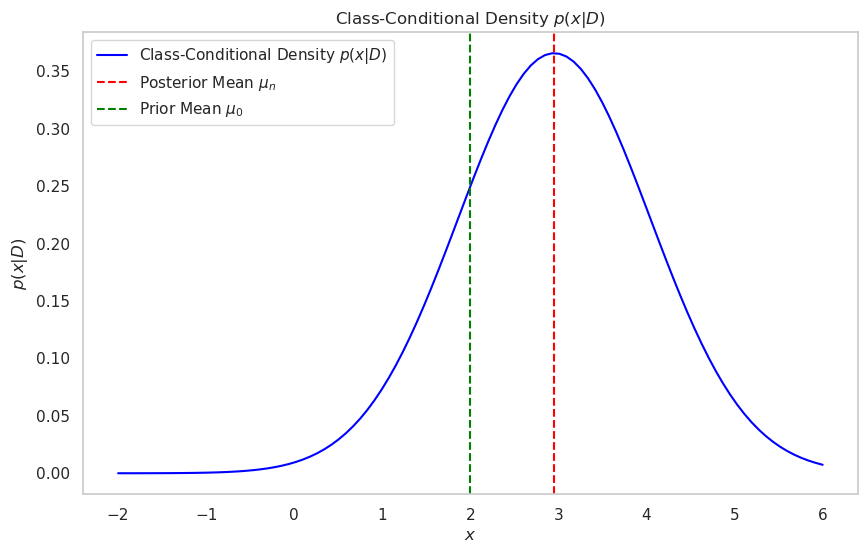

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Set up known parameters
sigma = 1.0          # Known variance of the likelihood
mu_0 = 2.0           # Prior mean
sigma_0_squared = 4.0  # Prior variance
data = np.array([2.5, 3.0, 3.5, 2.8, 3.2])  # Observed data

# Number of observations
n = len(data)

# Step 2: Compute posterior parameters
# Sample mean of the data
x_bar_n = np.mean(data)

# Posterior variance
sigma_n_squared = 1 / (n/sigma**2 + 1/sigma_0_squared)

# Posterior mean
mu_n = (n * sigma_0_squared * x_bar_n + sigma**2 * mu_0) / (n * sigma_0_squared + sigma**2)

# Step 3: Define the class-conditional density p(x|D)
def p_x_given_D(x):
    return (1 / np.sqrt(2 * np.pi * (sigma**2 + sigma_n_squared))) * \
           np.exp(-0.5 * ((x - mu_n)**2) / (sigma**2 + sigma_n_squared))

# Generate x values for plotting
x_values = np.linspace(-2, 6, 100)
p_values = p_x_given_D(x_values)

# Step 4: Plot the density using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=p_values, label='Class-Conditional Density $p(x|D)$', color='blue')
plt.title('Class-Conditional Density $p(x|D)$')
plt.xlabel('$x$')
plt.ylabel('$p(x|D)$')
plt.axvline(mu_n, color='red', linestyle='--', label='Posterior Mean $\mu_n$')
plt.axvline(mu_0, color='green', linestyle='--', label='Prior Mean $\mu_0$')
plt.legend()
plt.grid()
plt.show()


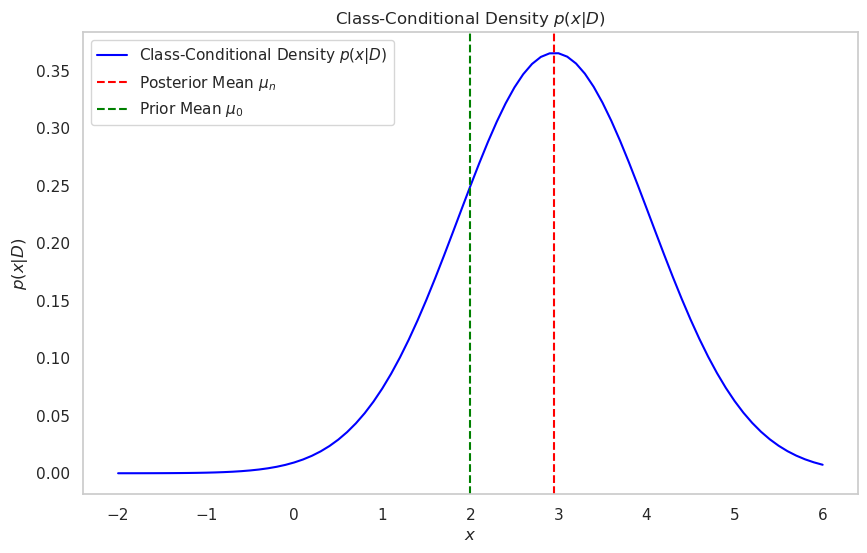

In [6]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Set up known parameters
sigma = 1.0          # Known variance of the likelihood
mu_0 = 2.0           # Prior mean
sigma_0_squared = 4.0  # Prior variance
data = [2.5, 3.0, 3.5, 2.8, 3.2]  # Observed data

# Number of observations
n = len(data)

# Step 2: Compute posterior parameters
# Sample mean of the data
x_bar_n = sum(data) / n

# Posterior variance
sigma_n_squared = 1 / (n / sigma**2 + 1 / sigma_0_squared)

# Posterior mean
mu_n = (n * sigma_0_squared * x_bar_n + sigma**2 * mu_0) / (n * sigma_0_squared + sigma**2)

# Step 3: Define the class-conditional density p(x|D)
def p_x_given_D(x):
    coefficient = 1 / math.sqrt(2 * math.pi * (sigma**2 + sigma_n_squared))
    exponent = -0.5 * ((x - mu_n) ** 2) / (sigma**2 + sigma_n_squared)
    return coefficient * math.exp(exponent)

# Generate x values for plotting
x_values = [i * 0.1 for i in range(-20, 61)]  # from -2 to 6
p_values = [p_x_given_D(x) for x in x_values]

# Step 4: Plot the density using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=p_values, label='Class-Conditional Density $p(x|D)$', color='blue')
plt.title('Class-Conditional Density $p(x|D)$')
plt.xlabel('$x$')
plt.ylabel('$p(x|D)$')
plt.axvline(mu_n, color='red', linestyle='--', label='Posterior Mean $\mu_n$')
plt.axvline(mu_0, color='green', linestyle='--', label='Prior Mean $\mu_0$')
plt.legend()
plt.grid()
plt.show()


## The Multivariate Case

In the multivariate case, we assume that the covariance matrix $ \Sigma $ is known, while the mean vector $ \mu $ is unknown. We consider the following distributions:

$$
p(x | \mu) \sim \mathcal{N}(\mu, \Sigma)
$$
$$
p(\mu) \sim \mathcal{N}(\mu_0, \Sigma_0)
$$

where $ \Sigma $, $ \Sigma_0 $, and $ \mu_0 $ are assumed to be known. After observing a set $ D $ of $ n $ independent samples $ x_1, \ldots, x_n $, we can apply Bayes' formula to obtain the posterior distribution:

$$
p(\mu | D) = \alpha \prod_{k=1}^{n} p(x_k | \mu) p(\mu)
$$

Expanding this expression, we have:

$$
p(\mu | D) = \alpha \exp \left( -\frac{1}{2} \left( \mu^T \left(n \Sigma^{-1} + \Sigma_0^{-1}\right) \mu - 2\sum_{k=1}^{n} \mu^T \Sigma^{-1} x_k + \mu_0^T \Sigma_0^{-1} \mu_0 \right) \right)
$$

This can be rewritten in the form:

$$
p(\mu | D) \propto \exp \left( -\frac{1}{2} \left( \mu - \mu_n\right)^T \Sigma_n^{-1} \left( \mu - \mu_n\right) \right)
$$

Thus, we find that:

$$
p(\mu | D) \sim \mathcal{N}(\mu_n, \Sigma_n)
$$

### Posterior Mean and Covariance

By equating coefficients, we obtain the analogs of the univariate case:

$$
\Sigma_n^{-1} = n \Sigma^{-1} + \Sigma_0^{-1}
$$

$$
n \mu_n = n \Sigma \Sigma^{-1} \hat{\mu}_n + \Sigma^{-1} \mu_0
$$

where $ \hat{\mu}_n $ is the sample mean given by:

$$
\hat{\mu}_n = \frac{1}{n} \sum_{k=1}^{n} x_k
$$

### Final Results

Solving these equations for $ \mu_n $ and $ \Sigma_n $ leads to:

$$
\mu_n = \left( \Sigma_0^{-1} + n \Sigma^{-1} \right)^{-1} \left( \Sigma_0^{-1} \mu_0 + n \Sigma^{-1} \hat{\mu}_n \right)
$$

$$
\Sigma_n = \left( \Sigma_0^{-1} + n \Sigma^{-1} \right)^{-1}
$$

### Class-Conditional Density

To derive $ p(x | D) $, we can express it as follows:

$$
p(x | D) = p(x | \mu) p(\mu | D) d\mu
$$

This result can also be shown more easily by noting that $ x $ can be viewed as the sum of two independent random vectors: a random vector $ \mu $ with $ p(\mu | D) \sim \mathcal{N}(\mu_n, \Sigma_n) $ and an independent random vector $ y $ with $ p(y) \sim \mathcal{N}(0, \Sigma) $. Since the sum of two independent normally distributed vectors is also normally distributed, we find that:

$$
p(x | D) \sim \mathcal{N}(\mu_n, \Sigma + \Sigma_n)
$$


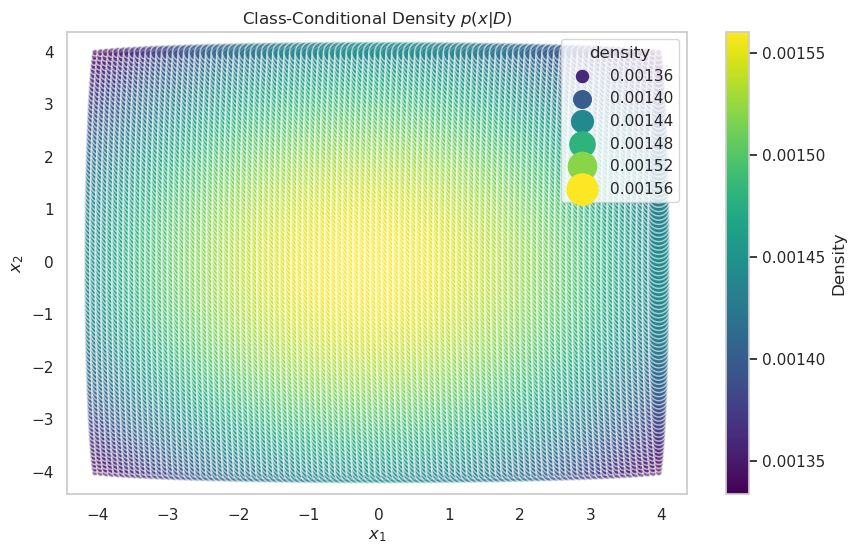

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

# Parameters
n = 100  # Number of samples
mu_0 = [0, 0]  # Prior mean
sigma_0 = [[1, 0], [0, 1]]  # Prior covariance
sigma = [[1, 0], [0, 1]]  # Likelihood covariance

# Generating synthetic data
def multivariate_normal(mu, sigma, n):
    samples = []
    for _ in range(n):
        sample = [random.gauss(mu[i], sigma[i][i] ** 0.5) for i in range(len(mu))]
        samples.append(sample)
    return samples

# Create synthetic samples
samples = multivariate_normal(mu_0, sigma, n)

# Compute sample mean
def sample_mean(samples):
    mean = [0, 0]
    for s in samples:
        for i in range(len(s)):
            mean[i] += s[i]
    return [m / n for m in mean]

mu_hat_n = sample_mean(samples)

# Compute posterior parameters
def posterior_params(mu_hat_n, sigma_0, sigma, n):
    # Inverting the covariance matrices for calculation
    inv_sigma_0 = [[1/sigma_0[0][0], 0], [0, 1/sigma_0[1][1]]]
    inv_sigma = [[1/sigma[0][0], 0], [0, 1/sigma[1][1]]]
    
    # Calculate posterior covariance
    inv_sigma_n = [[inv_sigma[0][0] + n * inv_sigma_0[0][0], inv_sigma[0][1] + n * inv_sigma_0[0][1]],
                   [inv_sigma[1][0] + n * inv_sigma_0[1][0], inv_sigma[1][1] + n * inv_sigma_0[1][1]]]
    
    # Posterior mean calculation
    mu_n = [(inv_sigma_0[0][0] * mu_0[0] + n * inv_sigma[0][0] * mu_hat_n[0]) / (inv_sigma_0[0][0] + n * inv_sigma[0][0]),
             (inv_sigma_0[1][1] * mu_0[1] + n * inv_sigma[1][1] * mu_hat_n[1]) / (inv_sigma_0[1][1] + n * inv_sigma[1][1])]
    
    return mu_n, inv_sigma_n

# Get posterior parameters
mu_n, sigma_n = posterior_params(mu_hat_n, sigma_0, sigma, n)

# Function to generate the class-conditional density p(x | D)
def conditional_density(mu_n, sigma, sigma_n, n_points=100):
    x1 = [mu_n[0] - 4 * (sigma[0][0] ** 0.5) + i * (8 * (sigma[0][0] ** 0.5) / (n_points - 1)) for i in range(n_points)]
    x2 = [mu_n[1] - 4 * (sigma[1][1] ** 0.5) + j * (8 * (sigma[1][1] ** 0.5) / (n_points - 1)) for j in range(n_points)]
    p_x = []
    
    for i in range(n_points):
        for j in range(n_points):
            # Density calculation
            exponent = -0.5 * (((x1[i] - mu_n[0]) ** 2 / (sigma[0][0] + sigma_n[0][0])) + 
                               ((x2[j] - mu_n[1]) ** 2 / (sigma[1][1] + sigma_n[1][1])))
            density = (1 / (2 * 3.14159 * (sigma[0][0] + sigma_n[0][0]) ** 0.5 * (sigma[1][1] + sigma_n[1][1]) ** 0.5)) * \
                       (2.71828 ** exponent)
            p_x.append((x1[i], x2[j], density))
    
    return p_x

# Generate class-conditional density
density_points = conditional_density(mu_n, sigma, sigma_n)

# Prepare data for plotting
x_vals = [pt[0] for pt in density_points]
y_vals = [pt[1] for pt in density_points]
z_vals = [pt[2] for pt in density_points]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'x': x_vals,
    'y': y_vals,
    'density': z_vals
})

# Plotting
plt.figure(figsize=(10, 6))
sc = sns.scatterplot(data=df, x='x', y='y', hue='density', palette='viridis', size='density', sizes=(20, 500), alpha=0.6)

# Create a colorbar based on the scatter plot
norm = plt.Normalize(df['density'].min(), df['density'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # only needed for older versions of matplotlib
plt.colorbar(sm, label='Density')

plt.title('Class-Conditional Density $p(x|D)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()


##  Bayesian Parameter Estimation: General Theory

We have just seen how the Bayesian approach can be used to obtain the desired density $ p(x|D) $ in a special case — the multivariate Gaussian. This approach can be generalized to apply to any situation in which the unknown density can be parameterized. The basic assumptions are summarized as follows:

- The form of the density $ p(x|\theta) $ is assumed to be known, but the value of the parameter vector $ \theta $ is not known exactly.
- Our initial knowledge about $ \theta $ is assumed to be contained in a known a priori density $ p(\theta) $.
- The rest of our knowledge about $ \theta $ is contained in a set $ D $ of $ n $ samples $ x_1, \ldots, x_n $ drawn independently according to the unknown probability density $ p(x) $.

The basic problem is to compute the posterior density $ p(\theta|D) $, since from this we can use Eq. (26) to compute $ p(x|D) $:

$$
p(x|D) = \int p(x|\theta)p(\theta|D) d\theta. \tag{50}
$$

By Bayes’ formula we have

$$
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{\int p(D|\theta)p(\theta) d\theta}, \tag{51}
$$

and by the independence assumption

$$
p(D|\theta) = \prod_{k=1}^n p(x_k|\theta). \tag{52}
$$

This constitutes the solution to the problem, and Eqs. (51) & (52) illuminate its relation to the maximum likelihood solution. Suppose that $ p(D|\theta) $ reaches a sharp peak at $ \theta = \hat{\theta} $. If the prior density $ p(\theta) $ is not zero at $ \theta = \hat{\theta} $ and does not change much in the surrounding neighborhood, then $ p(\theta|D) $ also peaks at that point. Thus, Eq. (26) shows that

$$
p(x|D) \approx p(x|\hat{\theta}), 
$$

the result one would obtain by using the maximum likelihood estimate as if it were the true value. If the peak of $ p(D|\theta) $ is very sharp, then the influence of prior information on the uncertainty in the true value of $ \theta $ can be ignored. In this and even the more general case, though, the Bayesian solution tells us how to use all the available information to compute the desired density $ p(x|D) $.

While we have obtained the formal Bayesian solution to the problem, a number of interesting questions remain. One concerns the difficulty of carrying out these computations. Another concerns the convergence of $ p(x|D) $ to $ p(x) $. We shall discuss the matter of convergence briefly and later turn to the computational question.

To indicate explicitly the number of samples in a set for a single category, we shall write $ D_n = \{x_1, \ldots, x_n\} $. Then from Eq. (52), if $ n > 1 $

$$
p(D_n | \theta) = p(x_n | \theta)p(D_{n-1} | \theta). \tag{53}
$$

Substituting this in Eq. (51) and using Bayes’ formula, we see that the posterior density

$$
p(\theta|D_n) = \frac{p(x_n | \theta)p(\theta|D_{n-1})}{p(x_n | \theta)p(\theta|D_{n-1}) d\theta}. \tag{54}
$$

With the understanding that $ p(\theta|D_0) = p(\theta) $, repeated use of this equation produces the sequence of densities 

$$
p(\theta), p(\theta|x_1), p(\theta|x_1, x_2), \ldots 
$$

(It should be obvious from Eq. (54) that $ p(\theta|D_n) $ depends only on the points in $ D_n $, not the sequence in which they were selected.) This is called the recursive Bayes approach to parameter estimation. This is, too, our first example of an incremental or on-line learning method, where learning goes on as the data is collected.

When this sequence of densities converges to a Dirac delta function centered about the true parameter value — Bayesian learning (Example 1). We shall come across many other, non-incremental learning schemes, where all the training data must be present before learning can take place. In principle, Eq. (54) requires that we preserve all the training points in $ D_{n-1} $ in order to calculate $ p(\theta|D_n) $, but for some distributions, just a few parameters associated with $ p(\theta|D_{n-1}) $ contain all the information needed. Such parameters are the sufficient statistics of those distributions, as we shall see in Sect. 3.6. Some authors reserve the term recursive learning to apply to only those cases where the sufficient statistics are retained — not the training data — when incorporating the information from a new training point. We could call this more restrictive usage true recursive Bayes learning.


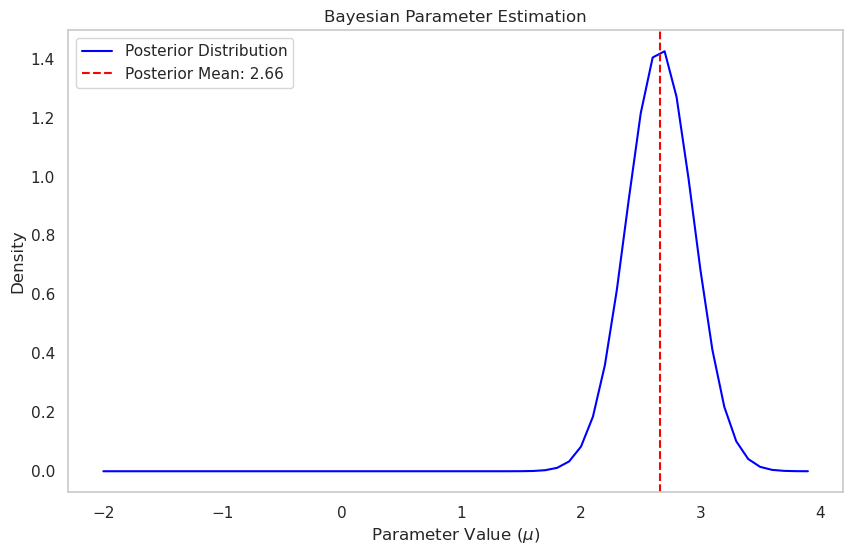

In [9]:
import matplotlib.pyplot as plt
import math

# Define a function to compute the prior, likelihood, and posterior
def bayesian_parameter_estimation(data, mu0, sigma0_squared, sigma_squared):
    n = len(data)  # number of data points
    sample_mean = sum(data) / n  # sample mean
    
    # Compute posterior parameters
    sigma_n_squared = 1 / (n / sigma_squared + 1 / sigma0_squared)
    mu_n = sigma_n_squared * (sample_mean * n / sigma_squared + mu0 / sigma0_squared)

    return mu_n, sigma_n_squared

# Function to compute the normal probability density function
def normal_pdf(x, mean, variance):
    return (1 / math.sqrt(2 * math.pi * variance)) * math.exp(-((x - mean) ** 2) / (2 * variance))

# Generate sample data (you can replace this with real data)
data = [2.5, 2.7, 3.0, 3.2, 2.8, 3.1]  # Example data points

# Prior parameters
mu0 = 0  # prior mean
sigma0_squared = 1  # prior variance
sigma_squared = 0.5  # known variance of the data

# Get posterior parameters
mu_n, sigma_n_squared = bayesian_parameter_estimation(data, mu0, sigma0_squared, sigma_squared)

# Create a range of x values for plotting
x_values = [i / 10 for i in range(-20, 40)]  # Range for x
posterior_pdf = [normal_pdf(x, mu_n, sigma_n_squared) for x in x_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_pdf, label='Posterior Distribution', color='blue')
plt.title('Bayesian Parameter Estimation')
plt.xlabel('Parameter Value ($\mu$)')
plt.ylabel('Density')
plt.axvline(mu_n, color='red', linestyle='--', label=f'Posterior Mean: {mu_n:.2f}')
plt.grid()
plt.legend()
plt.show()


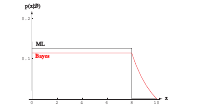

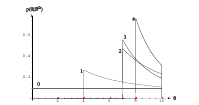

# Example 1: Recursive Bayes Learning

We believe our one-dimensional samples come from a uniform distribution:

$$
p(x|\theta) \sim U(0, \theta) = \begin{cases}
\frac{1}{\theta} & 0 \leq x \leq \theta \\
0 & \text{otherwise}
\end{cases}
$$

Initially, we know only that our parameter $\theta$ is bounded, specifically $0 < \theta \leq 10$. This represents a non-informative or "flat prior" which we will discuss in Section 3.5.2.

We will use recursive Bayes methods to estimate $\theta$ and the underlying densities from the data set 

$$
D = \{4, 7, 2, 8\},
$$ 

which were selected randomly from the underlying distribution.

### Prior Distribution

Before any data arrives, we have:

$$
p(\theta|D_0) = p(\theta) = U(0, 10).
$$

### Updating with Data Points

1. **First Data Point ($x_1 = 4$)**:

   Using Equation 54, we get an improved estimate:

   $$
   p(\theta|D_1) \propto p(x|θ)p(θ|D_0) = \begin{cases}
   \frac{1}{\theta} & 4 \leq \theta \leq 10 \\
   0 & \text{otherwise}
   \end{cases}
   $$

2. **Second Data Point ($x_2 = 7$)**:

   For the second data point, we have:

   $$
   p(\theta|D_2) \propto p(x|θ)p(θ|D_1) = \begin{cases}
   \frac{1}{\theta^2} & 7 \leq \theta \leq 10 \\
   0 & \text{otherwise}
   \end{cases}
   $$

3. **Subsequent Data Points**:

   This pattern continues for the remaining sample points, resulting in the general form:

   $$
   p(\theta|D_n) \propto \frac{1}{\theta^n} \quad \text{for } \max[D_n] \leq \theta \leq 10.
   $$

### Maximum Likelihood Solution

Given our full data set, the maximum likelihood estimate is:

$$
\hat{\theta} = 8,
$$ 

which implies a uniform distribution:

$$
p(x|D) \sim U(0, 8).
$$

### Comparison of Distributions

According to our Bayesian methodology, the density is uniform up to $x = 8$, but has a tail at higher values, reflecting that the influence of our prior $p(\theta)$ has not yet been overwhelmed by the data. 

- The posterior $p(\theta|D_n)$ for the model and $n$ points in the data set begins as:

$$
p(\theta) \sim U(0, 10),
$$ 

and as more points are incorporated, it becomes increasingly peaked at the value of the highest data point.

The Bayesian and maximum likelihood distributions can be summarized as follows:

1. **Maximum Likelihood Distribution**:
   - $$p(x|\hat{\theta}) \sim U(0, 8)$$

2. **Bayesian Distribution**:
   - The Bayesian approach has a small tail above $x = 8$, indicating that values of $x$ near $10$ are possible based on the prior.

### Conclusion

While the maximum likelihood approach estimates a point in $\theta$ space, the Bayesian approach instead estimates a distribution. This distinction is crucial as it reflects the underlying uncertainty in parameter estimation.

Finally, the comparison is only fair once the distributions $p(x|D)$ are computed, revealing the impact of prior information and the data combined.


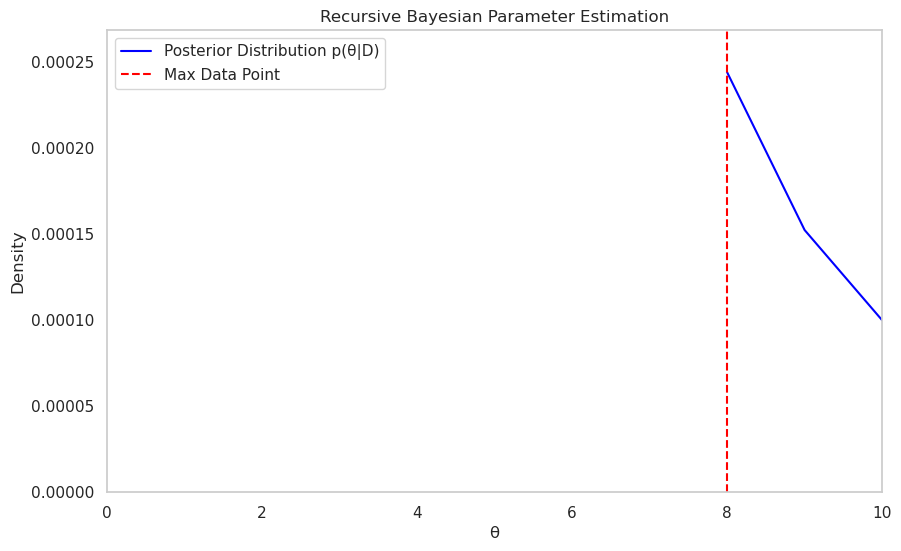

In [10]:
import matplotlib.pyplot as plt

# Data points
data = [4, 7, 2, 8]

# Function to update the posterior distribution based on the data points
def update_posterior(data):
    max_data = max(data)
    n = len(data)
    
    # Posterior distribution: p(θ|D_n) ∝ 1/θ^n for max[D_n] ≤ θ ≤ 10
    theta_values = []
    posterior_values = []
    
    for theta in range(max_data, 11):  # θ ranges from max(data) to 10
        theta_values.append(theta)
        posterior_values.append(1 / (theta ** n))
    
    return theta_values, posterior_values

# Update the posterior with each data point
theta_values, posterior_values = update_posterior(data)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_values, label='Posterior Distribution p(θ|D)', color='blue')
plt.title('Recursive Bayesian Parameter Estimation')
plt.xlabel('θ')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.ylim(0, max(posterior_values) * 1.1)
plt.axvline(x=max(data), color='red', linestyle='--', label='Max Data Point')
plt.grid()
plt.legend()
plt.show()


## Recursive Bayesian Learning

For most of the typically encountered probability densities $ p(x|\theta) $, the sequence of posterior densities does indeed converge to a delta function. Roughly speaking, this implies that with a large number of samples, there is only one value for$ \theta $ that causes $ p(x|\theta) $ to fit the data, i.e., that $ \theta $ can be determined uniquely from $ p(x|\theta) $. When this is the case, $ p(x|\theta) $ is said to be **identifiable**. 

A rigorous proof of convergence under these conditions requires a precise statement of the properties required of $ p(x|\theta) $ and $ p(\theta) $ and considerable care, but presents no serious difficulties (Problem 21). There are occasions, however, when more than one value of $ \theta $ may yield the same value for $ p(x|\theta) $. In such cases, $ \theta $ cannot be determined uniquely from $ p(x|\theta) $, and $ p(x|D_n) $ will peak near all of the values of $ \theta $ that explain the data. Fortunately, this means that $ p(x|D_n) $ will typically converge to $ p(x) $ whether or not $ p(x|\theta) $ is identifiable.

## When do Maximum Likelihood and Bayes Methods Differ?

In virtually every case, maximum likelihood and Bayes solutions are equivalent in the asymptotic limit of infinite training data. However, since practical pattern recognition problems invariably have a limited set of training data, it is natural to ask when maximum likelihood and Bayes solutions may be expected to differ, and then which we should prefer.

Several criteria influence our choice:

1. **Computational Complexity**: Maximum likelihood methods are often preferred since they require merely differential calculus techniques or gradient search for $ \hat{\theta} $, rather than a possibly complex multidimensional integration needed in Bayesian estimation.

2. **Interpretability**: The maximum likelihood solution will generally be easier to interpret and understand since it returns the single best model from the set the designer provided (and presumably understands). In contrast, Bayesian methods give a weighted average of models (parameters), often leading to solutions that are more complicated and harder to understand.

3. **Confidence in Prior Information**: A maximum likelihood solution $ p(x|\hat{\theta}) $ must, of course, be of the assumed parametric form; not so for the Bayesian solution. The Bayesian approach reflects the remaining uncertainty in the possible models.

4. **Bias-Variance Tradeoffs**: Bayesian methods make more explicit the crucial problem of bias and variance tradeoffs — roughly speaking, the balance between the accuracy of the estimation and its variance, which depend upon the amount of training data.

## Sources of Classification Error

When designing a classifier by either of these methods, we determine the posterior. There are costs, summarized in a cost matrix, which can be incorporated as well. There are three sources of classification error in our final system:

1. **Bayes or Indistinguishability Error**: The error due to overlapping densities $ p(x|\omega_i) $ for different values of $ i $. This error is an inherent property of the problem and can never be eliminated.

2. **Model Error**: The error due to having an incorrect model. This error can only be eliminated if the designer specifies a model that includes the true model that generated the data.

3. **Estimation Error**: The error arising from the fact that the parameters are estimated from a finite sample. This error can best be reduced by increasing the training data.

In the limit of infinite training data, the estimation error vanishes, and the total classification error will be the same for both maximum likelihood and Bayesian methods.

## Non-informative Priors and Invariance

Generally speaking, the information about the prior $ p(\theta) $ derives from the designer’s knowledge of the problem domain, and as such is beyond our study of the design of classifiers. However, in some cases, we have guidance in how to create priors that do not impose structure when we believe none exists, leading us to the notion of **non-informative priors**.

For example, when estimating the mean $ \mu $ and variance $ \sigma^2 $ of a Gaussian, we can define non-informative priors. There is an implied scale invariance, formally stated as:

$$
p(\theta) = \alpha p\left(\frac{\theta}{\alpha}\right)
$$

for some constant $ \alpha $. Such scale invariance can lead to priors such as:

$$
p(\mu) \propto \mu^{-k}
$$

for some undefined constant $ k $ (Problem 20). 

In general, if there is known or assumed invariance (such as translation), there will be constraints on the form of the prior. If we can find a prior that satisfies such constraints, the resulting prior is “non-informative” with respect to that invariance. 

It is crucial to acknowledge the assumed invariance — the choice of which generally lies outside our methodology. The greatest benefit of this approach is that it forces the designer to acknowledge and be clear about the assumed invariance.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


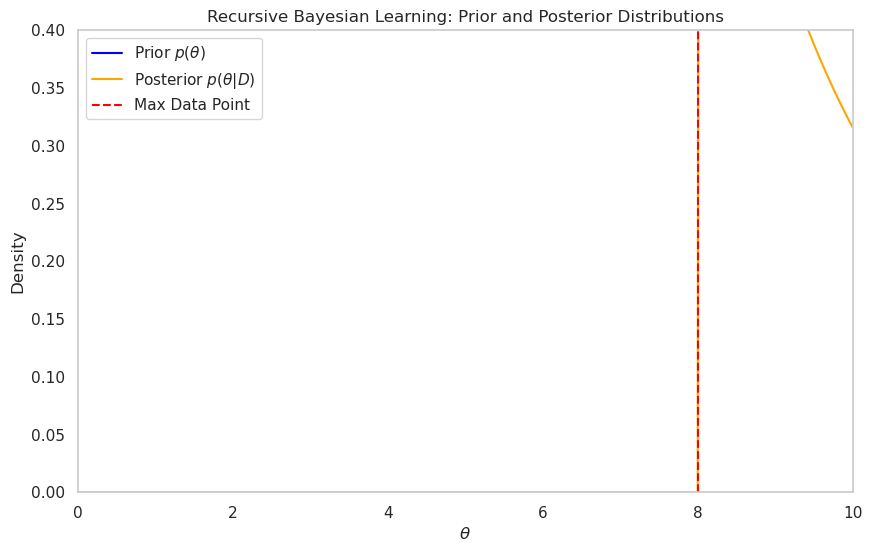

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Recursive Bayesian Learning Implementation

# Step 1: Define the data points and the range for θ
data = [4, 7, 2, 8]  # Observed data points
theta_values = np.linspace(0, 10, 1000)  # Range of θ from 0 to 10

# Step 2: Initialize the prior distribution p(θ) as a uniform distribution
prior = np.ones_like(theta_values)  # Uniform prior, equal density across θ

def update_posterior(prior, x, theta):
    """
    Update the posterior distribution based on a new data point using Bayes' theorem.

    Args:
    - prior (np.array): Current prior distribution over θ.
    - x (float): New data point.
    - theta (np.array): Range of θ values.

    Returns:
    - np.array: Updated posterior distribution over θ.
    """
    # Step 3: Compute the likelihood p(x|θ) = 1/θ for θ >= x
    likelihood = np.where(theta >= x, 1/theta, 0)  # Likelihood is 0 for θ < x

    # Step 4: Update the posterior using Bayes' theorem
    posterior = likelihood * prior

    # Normalize the posterior distribution
    posterior /= np.trapz(posterior, theta)  # Use trapezoidal integration for normalization
    return posterior

# Step 5: Update the posterior for each data point in the dataset
posterior = prior.copy()  # Start with the prior as the initial posterior
for x in data:
    posterior = update_posterior(posterior, x, theta_values)  # Update for each data point

# Step 6: Plot the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior, label='Prior $p(θ)$', color='blue')  # Plot prior
plt.plot(theta_values, posterior, label='Posterior $p(θ|D)$', color='orange')  # Plot posterior
plt.title('Recursive Bayesian Learning: Prior and Posterior Distributions')
plt.xlabel('$θ$')
plt.ylabel('Density')
plt.axvline(x=max(data), color='red', linestyle='--', label='Max Data Point')  # Mark max data point
plt.xlim(0, 10)
plt.ylim(0, 0.4)
plt.legend()
plt.grid()
plt.show()  # Show the plot


## Sufficient Statistics

From a practical viewpoint, the formal solution provided by Eqs. 26, 51 & 52 is not computationally attractive. In pattern recognition applications, it is not unusual to have dozens or hundreds of parameters and thousands of training samples, which makes the direct computation and tabulation of $ p(D|\theta) $ or $ p(\theta|D) $ quite out of the question. We shall see in Chapter ?? how neural network methods avoid many of the difficulties of setting such a large number of parameters in a classifier, but for now we note that the only hope for an analytic, computationally feasible maximum likelihood solution lies in being able to find a parametric form for $ p(x|\theta) $ that, on the one hand, matches the characteristics of the problem and, on the other hand, allows a reasonably tractable solution.

Consider the simplification that occurred in the problem of learning the parameters of a multivariate Gaussian density. The basic data processing required was merely the computation of the sample mean and sample covariance. This easily computed and easily updated statistic contained all the information in the samples relevant to estimating the unknown population mean and covariance. One might suspect that this simplicity is just one more happy property of the normal distribution and that such good fortune is not likely to occur in other cases. While this is largely true, there are distributions for which computationally feasible solutions can be obtained, and the key to their simplicity lies in the notion of a sufficient statistic.

To begin with, any function of the samples is a statistic. Roughly speaking, a sufficient statistic is a (possibly vector-valued) function $ s $ of the samples $ D $ that contains all of the information relevant to estimating some parameter $ \theta $. Intuitively, one might expect the definition of a sufficient statistic to involve the requirement that 

$$ 
p(\theta|s, D) = p(\theta|s) 
$$ 

However, this would require treating $ \theta $ as a random variable, limiting the definition to a Bayesian domain. To avoid such a limitation, the conventional definition is as follows:

**A statistic $ s $ is said to be sufficient for $ \theta $ if $ p(D|s,\theta) $ is independent of $ \theta $.**

If we think of $ \theta $ as a random variable, we can write 

$$ 
p(\theta|s, D) = \frac{p(D|s, \theta)p(\theta|s)}{p(D|s)} 
$$ 

whereupon it becomes evident that 

$$ 
p(\theta|s, D) = p(\theta|s) 
$$ 

if $ s $ is sufficient for $ \theta $. Conversely, if $ s $ is a statistic for which $ p(\theta|s, D) = p(\theta|s) $, and if $ p(\theta|s) \neq 0 $, it is easy to show that $ p(D|s, \theta) $ is independent of $ \theta $.

Thus, the intuitive and the conventional definitions are basically equivalent. As one might expect, for a Gaussian distribution, the sample mean and covariance, taken together, represent a sufficient statistic for the true mean and covariance; if these are known, all other statistics such as the mode, range, higher-order moments, number of data points, etc., are superfluous when estimating the true mean and covariance.

A fundamental theorem concerning sufficient statistics is the **Factorization Theorem**, which states that $ s $ is sufficient for $ \theta $ if and only if 

$$ 
p(D|\theta) = g(s, \theta)h(D) 
$$ 

for some function $ h(\cdot) $. The virtue of the Factorization Theorem is that it allows us to shift our attention from the rather complicated density $ p(D|s, \theta) $ used to define a sufficient statistic to the simpler function 

$$ 
p(D|\theta) = \prod_{k=1}^{n} p(x_k |\theta) 
$$ 

In addition, the Factorization Theorem makes it clear that the characteristics of a sufficient statistic are completely determined by the density $ p(x|\theta) $ and have nothing to do with a felicitous choice of an a priori density $ p(\theta) $. 

A proof of the Factorization Theorem in the continuous case is somewhat tricky because degenerate situations are involved. Since the proof has some intrinsic interest, however, we include one for the simpler discrete case. 

## Theorem 3.1 (Factorization)

A statistic $ s $ is sufficient for $ \theta $ if and only if the probability $ P(D|\theta) $ can be written as the product 

$$ 
P(D|\theta) = g(s, \theta)h(D) 
$$ 

for some function $ h(\cdot) $.

### Proof:

(a) We begin by showing the “if” part of the theorem. Suppose first that $ s $ is sufficient for $ \theta $, so that $ P(D|s, \theta) $ is independent of $ \theta $. Since we want to show that $ P(D|\theta) $ can be factored, our attention is directed toward computing $ P(D|\theta) $ in terms of $ P(D|s, \theta) $. We do this by summing the joint probability $ P(D, s|\theta) $ over all values of $ s $:

$$ 
P(D|\theta) = \sum_{s} P(D, s|\theta) = \sum_{s} P(D|s, \theta)P(s|\theta). 
$$ 

But since $ s = \phi(D) $ for some $ \phi(\cdot) $, there is only one possible value for $ s $ for the given data, and thus 

$$ 
P(D|\theta) = P(D|s, \theta)P(s|\theta). 
$$ 

Moreover, since by hypothesis $ P(D|s, \theta) $ is independent of $ \theta $, the first factor depends only on $ D $. Identifying $ P(s|\theta) $ with $ g(s, \theta) $, we see that $ P(D|\theta) $ factors, as desired.

(b) We now consider the “only if” part of the theorem. To show that the ability to factor $ P(D|\theta) $ as the product $ g(s, \theta)h(D) $ implies that $ s $ is sufficient for $ \theta $, we must show that such a factoring implies that the conditional probability $ P(D|s, \theta) $ is independent of $ \theta $. Because $ s = \phi(D) $, specifying a value for $ s $ constrains the possible sets of samples to some set $ \bar{D} $. Formally, 

$$ 
\bar{D} = \{D|\phi(D) = s\}. 
$$ 

If $ \bar{D} $ is empty, no assignment of values to the samples can yield that value of $ s $, and $ P(s|\theta) = 0 $. Excluding such cases, i.e., considering only values of $ s $ that can arise, we have 

$$ 
P(D,s|\theta) = P(D|s, \theta)P(s|\theta). 
$$ 

The denominator can be computed by summing the numerator over all values of $ D $. Since the numerator will be zero if $ D \notin \bar{D} $, we can restrict the summation to $ D \in \bar{D} $. That is, 

$$ 
\frac{P(D|s, \theta)}{P(D|s, \theta)} = \frac{g(s, \theta)h(D)}{h(D)} 
$$ 

which is independent of $ \theta $. Thus, by definition, $ s $ is sufficient for $ \theta $.

It should be pointed out that there are trivial ways of constructing sufficient statistics. For example, we can define $ s $ to be a vector whose components are the $ n $ samples themselves: $ x_1, \ldots, x_n $. In that case, $ g(s, \theta) = p(D|\theta) $ and $ h(D) = 1 $. One can even produce a scalar sufficient statistic by the trick of interleaving the digits in the decimal expansion of the components of the $ n $ samples. Sufficient statistics such as these are of little interest, since they do not provide us with simpler results. 

The ability to factor $ p(D|\theta) $ into a product $ g(s, \theta)h(D) $ is interesting only when the function $ g $ and the sufficient statistic $ s $ are simple. It should be noted that sufficiency is an integral notion. That is, if $ s $ is a sufficient statistic for $ \theta $, this does not necessarily imply that their corresponding components are sufficient, i.e., that $ s_1 $ is sufficient for $ \theta_1 $, or $ s_2 $ for $ \theta_2 $, and so on.

An obvious fact should also be mentioned: the factoring of $ p(D|\theta) $ into $ g(s, \theta)h(D) $ is not unique. If $ f(s) $ is any function of $ s $, then 

$$ 
g'(s, \theta) = f(s)g(s, \theta), \quad h'(D) = \frac{h(D)}{f(s)} 
$$ 

will provide an alternative pair that also satisfies the factorization condition.

## Example : Binomial Distribution

To illustrate the notion of sufficient statistics, we will examine the binomial distribution. The binomial distribution is given by

$$ 
P(k|\theta) = {n \choose k} \theta^k (1 - \theta)^{n-k}, 
$$ 

where $ k $ is the number of successes in $ n $ trials and $ \theta $ is the probability of success in each trial. Thus, $ k $ is a random variable that takes on integer values in $ \{0, 1, \ldots, n\} $.

Using the factorization theorem, we see that 

$$ 
P(D|\theta) = P(k_1|\theta)P(k_2|\theta) \ldots P(k_n|\theta) = {n \choose k_1} \theta^{k_1}(1 - \theta)^{n-k_1} \ldots {n \choose k_n} \theta^{k_n}(1 - \theta)^{n-k_n}. 
$$ 

To determine whether $ k = \sum_{i=1}^n k_i $ is a sufficient statistic, we must establish the conditions of the theorem. Notice that 

$$ 
P(D|\theta) = g(k, \theta)h(D), 
$$ 

where $ g(k, \theta) = {n \choose k} \theta^k (1 - \theta)^{n-k} $ and $ h(D) = 1 $ (noting that $ h(D) $ is a function of the data that does not depend on $ \theta $). 

Thus, we conclude that $ k $ is indeed a sufficient statistic for $ \theta $.

## Example : Poisson Distribution

Next, consider the Poisson distribution defined by 

$$ 
P(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}, 
$$ 

where $ k $ is the number of occurrences of an event in a fixed interval, and $ \lambda $ is the average rate at which events occur.

In this case, we must again examine whether the total number of occurrences $ k = \sum_{i=1}^n k_i $ is a sufficient statistic for $ \lambda $. We note that the joint distribution can be written as

$$ 
P(D|\lambda) = P(k_1|\lambda)P(k_2|\lambda) \ldots P(k_n|\lambda) = \frac{\lambda^{k_1} e^{-\lambda}}{k_1!} \frac{\lambda^{k_2} e^{-\lambda}}{k_2!} \ldots \frac{\lambda^{k_n} e^{-\lambda}}{k_n!}. 
$$ 

Thus, we have

$$ 
P(D|\lambda) = \frac{\lambda^{\sum k_i} e^{-n\lambda}}{\prod_{i=1}^n k_i!} 
$$ 

which shows that

$$ 
P(D|\lambda) = g(k, \lambda)h(D) 
$$ 

with 

$$ 
g(k, \lambda) = \lambda^{\sum k_i} e^{-n\lambda} \quad \text{and} \quad h(D) = \frac{1}{\prod_{i=1}^n k_i!}. 
$$ 

Therefore, the total count $ k $ is a sufficient statistic for the parameter $ \lambda $.

## Conclusion

The concept of sufficient statistics is a powerful tool in statistics and machine learning, as it allows for the reduction of complex models into simpler forms while retaining all relevant information about the parameters of interest. Understanding how to identify and utilize sufficient statistics is crucial for effective model development and parameter estimation.


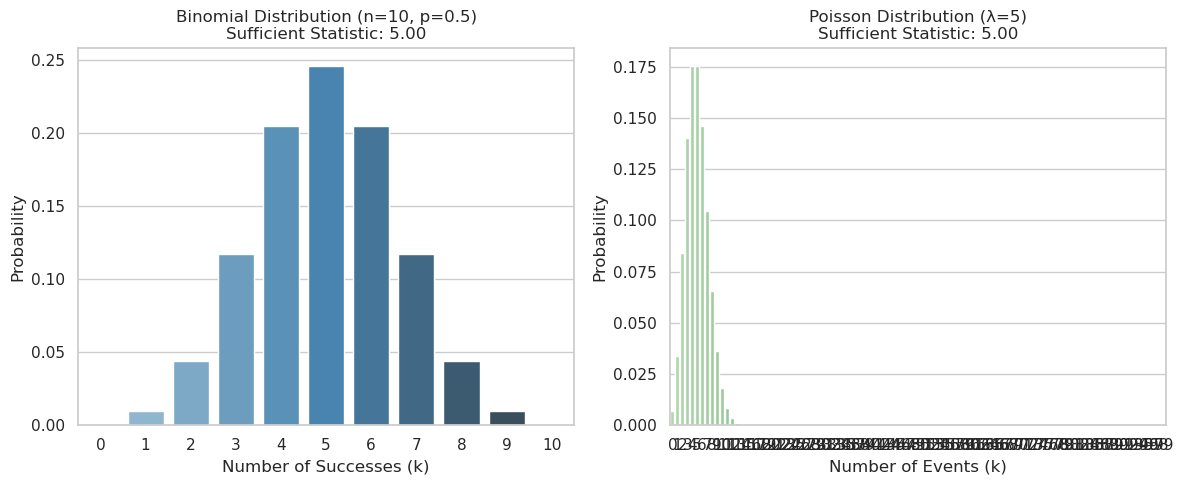

In [13]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the style for Seaborn
sns.set(style="whitegrid")

# Function to calculate factorial
def factorial(n):
    """Returns the factorial of n."""
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Function to calculate the binomial coefficient
def binomial_coefficient(n, k):
    """Calculates the binomial coefficient C(n, k)."""
    return factorial(n) // (factorial(k) * factorial(n - k))

# Function to calculate Binomial distribution and its sufficient statistic
def binomial_distribution(n, p):
    k = np.arange(0, n + 1)  # Number of successes
    binomial_probs = [binomial_coefficient(n, k_i) * (p ** k_i) * ((1 - p) ** (n - k_i)) for k_i in k]
    sufficient_statistic = np.sum(k * binomial_probs)  # Total successes (sufficient statistic)
    
    return k, binomial_probs, sufficient_statistic

# Function to calculate Poisson distribution and its sufficient statistic
def poisson_distribution(lamb, size=100):
    k = np.arange(0, size)
    poisson_probs = [(lamb ** k_i) * np.exp(-lamb) / factorial(k_i) for k_i in k]
    sufficient_statistic = np.sum(k * poisson_probs)  # Total occurrences (sufficient statistic)
    
    return k, poisson_probs, sufficient_statistic

# Parameters for distributions
n = 10          # Number of trials for binomial
p = 0.5         # Probability of success for binomial
lamb = 5        # Rate for Poisson

# Calculate distributions
binomial_k, binomial_probs, binomial_sufficient = binomial_distribution(n, p)
poisson_k, poisson_probs, poisson_sufficient = poisson_distribution(lamb)

# Plotting Binomial distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=binomial_k, y=binomial_probs, palette="Blues_d")
plt.title(f'Binomial Distribution (n={n}, p={p})\nSufficient Statistic: {binomial_sufficient:.2f}')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.xticks(binomial_k)

# Plotting Poisson distribution
plt.subplot(1, 2, 2)
sns.barplot(x=poisson_k, y=poisson_probs, palette="Greens_d")
plt.title(f'Poisson Distribution (λ={lamb})\nSufficient Statistic: {poisson_sufficient:.2f}')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.xticks(poisson_k)

# Show plots
plt.tight_layout()
plt.show()


## Sufficient Statistics and the Exponential Family

To see how the Factorization Theorem can be used to obtain sufficient statistics, consider once again the familiar $d$-dimensional normal case with fixed covariance but unknown mean, i.e., 

$$
p(x|\theta) \sim \mathcal{N}(\theta, \Sigma).
$$

Here we have 

$$
p(D|\theta) = \prod_{k=1}^{n} p(x_k | \theta) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} \sum_{k=1}^{n} (x_k - \theta)^T \Sigma^{-1} (x_k - \theta)\right).
$$

This can be factored as follows:

$$
p(D|\theta) = \frac{1}{(2\pi)^{nd/2} |\Sigma|^{n/2}} \exp\left(-\frac{n}{2} \theta^T \Sigma^{-1} \theta + \theta^T \Sigma^{-1} \sum_{k=1}^{n} x_k - \frac{1}{2} \sum_{k=1}^{n} x_k^T \Sigma^{-1} x_k \right).
$$

This factoring isolates the $\theta$ dependence of $p(D|\theta)$ in the first term, and hence from the Factorization Theorem, we conclude that 

$$
\sum_{k=1}^{n} x_k
$$ 

is sufficient for $\theta$. Of course, any one-to-one function of this statistic is also sufficient for $\theta$; in particular, the sample mean 

$$
\hat{\mu}_n = \frac{1}{n} \sum_{k=1}^{n} x_k
$$ 

is also sufficient for $\theta$. Using this statistic, we can write 

$$
g(\hat{\mu}_n, \theta) = \exp\left(-\frac{1}{2} \theta^T \Sigma^{-1} \theta - \theta^T \Sigma^{-1} \hat{\mu}_n\right).
$$

From this, we can obtain the kernel density:

$$
\bar{g}(\hat{\mu}_n, \theta) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (\theta - \hat{\mu}_n)^T \Sigma^{-1} (\theta - \hat{\mu}_n)\right).
$$

These results make it immediately clear that $\hat{\mu}_n$ is the maximum likelihood estimate for $\theta$. The Bayesian posterior density can be obtained from $\bar{g}(\hat{\mu}_n, \theta)$ by performing the integration indicated in the previous equation. If the a priori density is essentially uniform, 

$$
p(\theta|D) = \bar{g}(\hat{\mu}_n, \theta).
$$

This same general approach can be used to find sufficient statistics for other density functions. In particular, it applies to any member of the exponential family, a group of probability and probability density functions that possess simple sufficient statistics. Members of the exponential family include the Gaussian, exponential, Rayleigh, Poisson, and many other familiar distributions. They can all be written in the form:

$$
p(x|\theta) = \alpha(x) \exp\left[a(\theta) + b(\theta)^T c(x)\right].
$$

If we multiply \(n\) terms of the form in this equation, we find 

$$
p(D|\theta) = \exp\left[n a(\theta) + b(\theta)^T \sum_{k=1}^{n} c(x_k)\right] \alpha(x_k) = g(s, \theta) h(D),
$$ 

where we can take 

$$
s = \sum_{k=1}^{n} c(x_k), \quad g(s, \theta) = \exp[n(a(\theta) + b(\theta)^T s)], \quad h(D) = \prod_{k=1}^{n} \alpha(x_k).
$$

The distributions, sufficient statistics, and unnormalized kernels for a number of commonly encountered members of the exponential family are summarized in the accompanying table. It is a fairly routine matter to derive maximum likelihood estimates and Bayesian a posteriori distributions from these solutions. With two exceptions, the solutions given are for univariate cases, though they can be used in multivariate situations if statistical independence can be assumed. 

Note that a few well-known probability distributions, such as the Cauchy, do not have sufficient statistics, so that the sample mean can be a very poor estimator of the true mean (Problem 28).


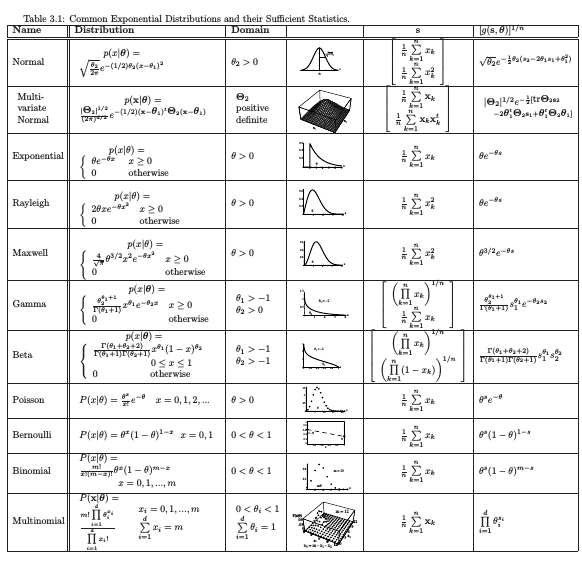

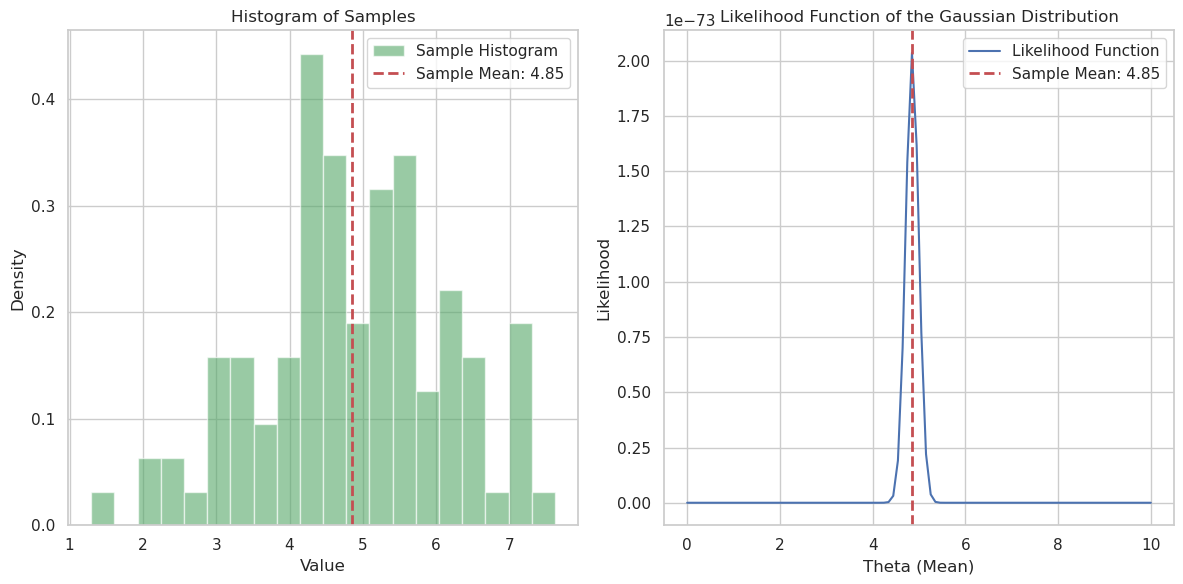

Sufficient Statistic (Sample Mean): 4.85
Sample Variance: 1.63


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
n = 100  # Number of samples
true_mean = 5.0  # True mean
true_variance = 2.0  # True variance
np.random.seed(42)  # Seed for reproducibility

# Generate random samples from a normal distribution
samples = np.random.normal(loc=true_mean, scale=np.sqrt(true_variance), size=n)

# Calculate the sample mean (sufficient statistic)
sample_mean = np.mean(samples)

# Calculate the sample variance
sample_variance = np.var(samples)

# Create a range of theta values for plotting the likelihood
theta = np.linspace(0, 10, 100)
likelihood = (1 / np.sqrt(2 * np.pi * true_variance)) * np.exp(-0.5 * ((samples[:, np.newaxis] - theta) ** 2) / true_variance)

# Compute the likelihood function
likelihood_product = np.prod(likelihood, axis=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the samples
plt.subplot(1, 2, 1)
plt.hist(samples, bins=20, density=True, alpha=0.6, color='g', label='Sample Histogram')
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')
plt.title('Histogram of Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plot the likelihood
plt.subplot(1, 2, 2)
plt.plot(theta, likelihood_product, label='Likelihood Function', color='b')
plt.axvline(sample_mean, color='r', linestyle='dashed', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')
plt.title('Likelihood Function of the Gaussian Distribution')
plt.xlabel('Theta (Mean)')
plt.ylabel('Likelihood')
plt.legend()

plt.tight_layout()
plt.show()

# Display sufficient statistics
print(f"Sufficient Statistic (Sample Mean): {sample_mean:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")


Sufficient statistic (Sample Mean): 4.2
Kernel density at sample mean: 0.8920620580763855


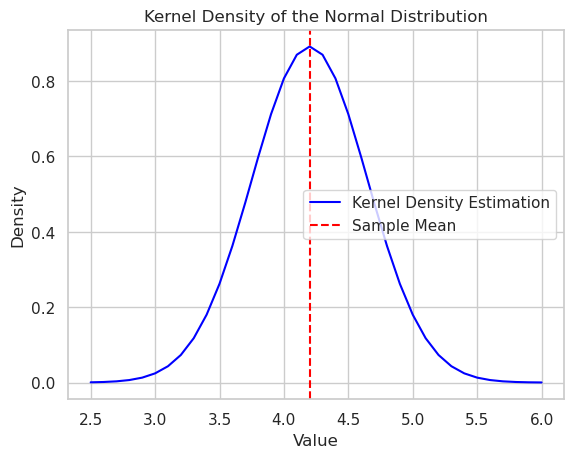

In [15]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import math

# Function to calculate the sample mean and sufficient statistic for a given dataset
def calculate_sufficient_statistics(data):
    # Calculate the sample mean
    n = len(data)  # Number of data points
    sample_mean = sum(data) / n  # Mean calculation
    return sample_mean

# Function to calculate the kernel density for the normal distribution
def kernel_density(mu, n, sigma_sq):
    # Calculate the kernel density based on the sufficient statistic
    coeff = 1 / (math.sqrt(2 * math.pi * sigma_sq / n))  # Normalization coefficient
    exponent = -((mu - sample_mean) ** 2) / (2 * sigma_sq / n)  # Exponent term
    return coeff * math.exp(exponent)

# Main code
if __name__ == "__main__":
    # Example dataset
    data = [2.5, 3.5, 4.0, 5.0, 6.0]
    
    # Calculate sufficient statistics
    sample_mean = calculate_sufficient_statistics(data)
    
    # Print the sufficient statistic
    print(f"Sufficient statistic (Sample Mean): {sample_mean}")

    # Parameters for kernel density estimation
    n = len(data)  # Number of data points
    sigma_sq = 1.0  # Variance (can be adjusted)
    
    # Calculate kernel density
    density = kernel_density(sample_mean, n, sigma_sq)
    
    # Print the kernel density value
    print(f"Kernel density at sample mean: {density}")

    # Plot the normal distribution curve
    x = [i / 10 for i in range(int(min(data) * 10), int(max(data) * 10) + 1)]
    y = [kernel_density(mu, n, sigma_sq) for mu in x]

    plt.plot(x, y, label='Kernel Density Estimation', color='blue')
    plt.title('Kernel Density of the Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
    plt.legend()
    plt.show()


# Common Exponential Distributions and their Sufficient Statistics

| Name        | Distribution                                                        | Domain               | Sufficient Statistic $ s $                  | $\frac{g(s, \theta)}{n}$                                           |
|-------------|---------------------------------------------------------------------|----------------------|-----------------------------------------------|---------------------------------------------------------------------|
| Normal      | $ p(x|\theta) = \frac{1}{\sqrt{2\pi}\theta} \exp\left(-\frac{1}{2\theta^2} \sum_{k=1}^n (x_k - \theta)^2\right) $ | $ \theta^2 > 0 $   | $ s_1 = \sum_{k=1}^n x_k $                | $ \frac{1}{2\theta^2} \left( s_2 - 2\theta s_1 + \theta^2 \right) $ |
| Multivariate | $ p(x|\theta) = \frac{1}{|\Theta^2|^{1/2}} \exp\left(-\frac{1}{2}(x - \theta)^T \Theta^{-2}(x - \theta)\right) $ | $ \Theta^2 $ positive definite | $ s_1 = \sum_{k=1}^n x_k $                | $ \frac{1}{2} \left( -\theta^T \Theta^{-2} s_1 + \theta^T \Theta^{-2} \theta \right) $ |
| Exponential | $ p(x|\theta) = \theta e^{-\theta x} $, $ x \geq 0 $               | $ \theta > 0 $     | $ s = \sum_{k=1}^n x_k $                  | $ \frac{g(s, \theta)}{n} = \theta e^{-\theta s} $                   |
| Rayleigh    | $ p(x|\theta) = \frac{1}{\theta} x e^{-\frac{x^2}{2\theta}} $, $ x \geq 0 $     | $ \theta > 0 $     | $ s = \sum_{k=1}^n x_k^2 $                | $ \frac{1}{\theta} e^{-\frac{s}{2\theta}} $                      |
| Maxwell     | $ p(x|\theta) = \frac{1}{2\theta^{3/2}} x^2 e^{-\frac{x^2}{2\theta}} $, $ x \geq 0 $ | $ \theta > 0 $     | $ s = \sum_{k=1}^n x_k^2 $                | $ \frac{1}{\theta^{3/2}} e^{-\frac{s}{2\theta}} $                 |
| Gamma       | $ p(x|\theta) = \frac{x^{\theta_1 - 1} e^{-\frac{x}{\theta_2}}}{\Gamma(\theta_1) \theta_2^{\theta_1}} $, $ x \geq 0 $ | $ \theta_1 > 0, \theta_2 > 0 $ | $ s_1 = \sum_{k=1}^n x_k, s_2 = \sum_{k=1}^n \ln x_k $ | $ \frac{g(s_1, s_2, \theta)}{n} = \frac{1}{\theta_2} e^{-\frac{s_1}{\theta_2}} $ |
| Beta        | $ p(x|\theta) = \frac{x^{\theta_1 - 1} (1-x)^{\theta_2 - 1}}{B(\theta_1, \theta_2)} $, $ 0 \leq x \leq 1 $ | \( \theta_1 > 0, \theta_2 > 0 $ | $ s_1 = \sum_{k=1}^n x_k, s_2 = \sum_{k=1}^n (1 - x_k) $ | $ \frac{g(s_1, s_2, \theta)}{n} = \frac{1}{B(\theta_1, \theta_2)} $ |
| Poisson     | $ p(x|\theta) = \frac{\theta^s e^{-\theta}}{s!} $                    | $ \theta > 0 $     | $ s = \sum_{k=1}^n x_k $                  | $ g(s, \theta) = \theta^s e^{-\theta} $                          |
| Bernoulli   | $ p(x|\theta) = \theta^s (1 - \theta)^{1-s} $, $ x = 0, 1 $         | $ 0 < \theta < 1 $ | $ s = \sum_{k=1}^n x_k $                  | $ g(s, \theta) = \theta^s (1 - \theta)^{n-s} $                    |
| Binomial    | $ p(x|\theta) = \binom{m}{x} \theta^s (1 - \theta)^{m-s} $            | $ 0 < \theta < 1 $ | $ s = \sum_{k=1}^n x_k $                  | $ g(s, \theta) = \theta^{s} (1 - \theta)^{m - s} $                |
| Multinomial | $ p(x|\theta) = \frac{m!}{x_1! x_2! ... x_d!} \prod_{i=1}^d \theta_i^{x_i} $ | $ \sum_{i=1}^d x_i = m, 0 < \theta_i < 1 $ | $ s_i = \sum_{k=1}^n x_{ik} $                | $ g(s, \theta) = \prod_{i=1}^d \theta_i^{s_i} $                    |



$$ Multinomial | \( p(x|\theta) = \frac{m!}{x_1! x_2! ... x_d!} \prod_{i=1}^d \theta_i^{x_i} \) | \( \sum_{i=1}^d x_i = m, 0 < \theta_i < 1 \) | \( s_i = \sum_{k=1}^n x_{ik} \)                | \( g(s, \theta) = \prod_{i=1}^d \theta_i^{s_i} \)                    |$$


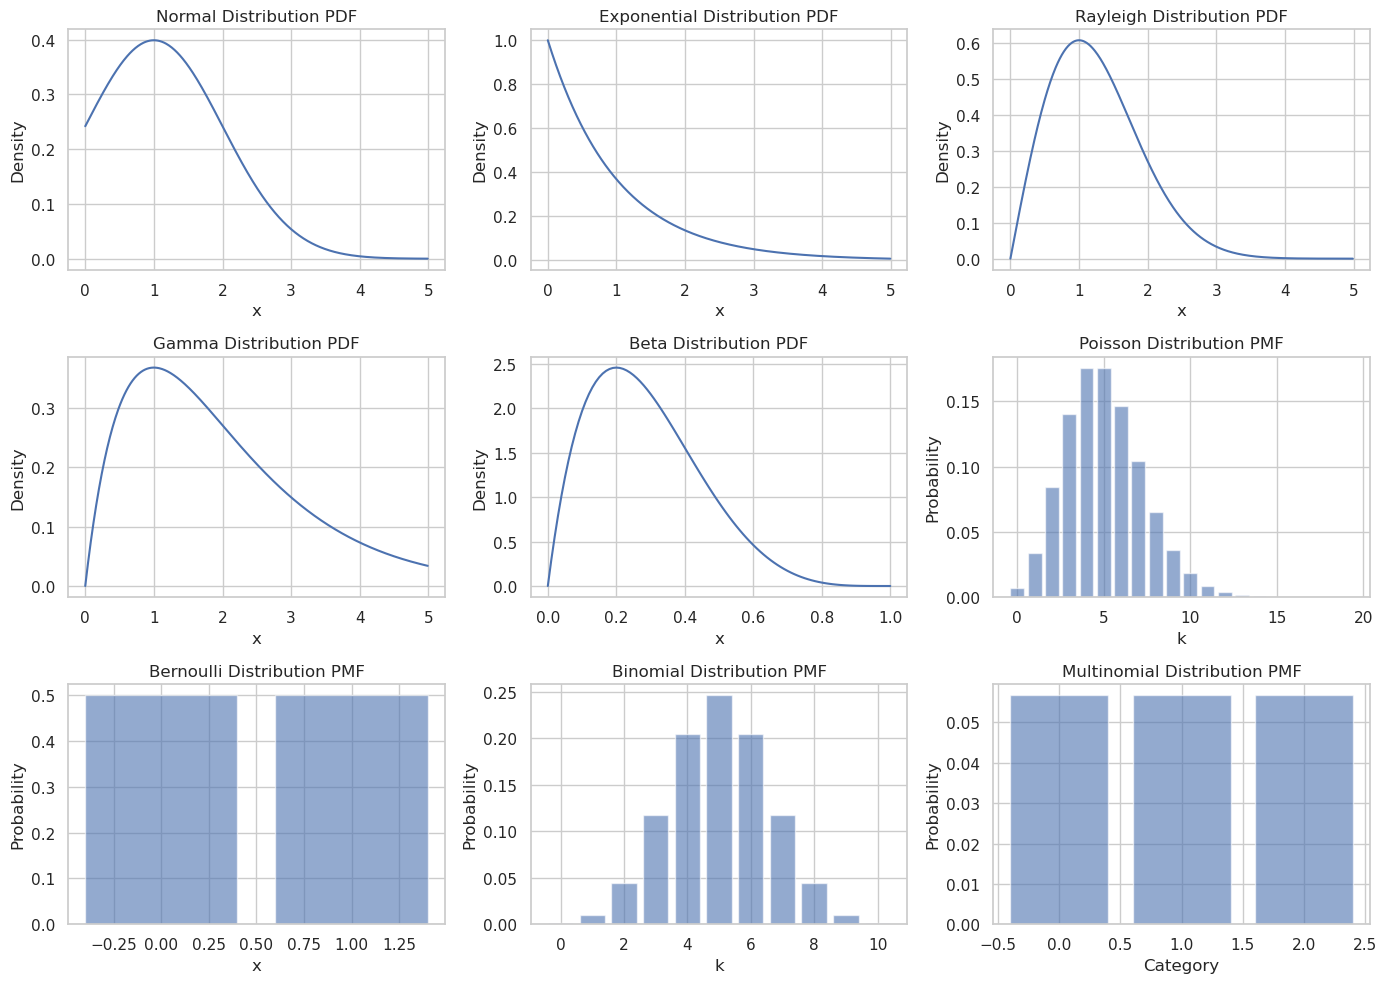

In [19]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate combinations
def comb(n, k):
    if k > n:
        return 0
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Function to calculate the product of a list
def product(lst):
    result = 1
    for number in lst:
        result *= number
    return result

# Function to calculate the Normal distribution PDF
def normal_pdf(x, theta):
    return (1 / (math.sqrt(2 * math.pi) * math.sqrt(theta))) * math.exp(-0.5 * ((x - theta) ** 2) / theta)

# Function to calculate the Exponential distribution PDF
def exponential_pdf(x, theta):
    return theta * math.exp(-theta * x)

# Function to calculate the Rayleigh distribution PDF
def rayleigh_pdf(x, theta):
    return (x / theta) * math.exp(-0.5 * (x ** 2) / theta)

# Function to calculate the Gamma distribution PDF
def gamma_pdf(x, theta1, theta2):
    return (x ** (theta1 - 1) * math.exp(-x / theta2)) / (math.gamma(theta1) * (theta2 ** theta1))

# Function to calculate the Beta distribution PDF
def beta_pdf(x, theta1, theta2):
    return (math.gamma(theta1 + theta2) / (math.gamma(theta1) * math.gamma(theta2))) * (x ** (theta1 - 1)) * ((1 - x) ** (theta2 - 1))

# Function to calculate the Poisson distribution PMF
def poisson_pmf(k, theta):
    return (theta ** k * math.exp(-theta)) / math.factorial(k)

# Function to calculate the Bernoulli distribution PMF
def bernoulli_pmf(x, theta):
    return theta ** x * (1 - theta) ** (1 - x)

# Function to calculate the Binomial distribution PMF
def binomial_pmf(k, n, theta):
    return (comb(n, k)) * (theta ** k) * ((1 - theta) ** (n - k))

# Function to calculate the Multinomial distribution PMF
def multinomial_pmf(x, n, thetas):
    coeff = math.factorial(n) / product([math.factorial(xi) for xi in x])
    return coeff * product([thetas[i] ** x[i] for i in range(len(x))])

# Parameters for the distributions
theta_normal = 1
theta_exponential = 1
theta_rayleigh = 1
theta1_gamma = 2
theta2_gamma = 1
theta1_beta = 2
theta2_beta = 5
theta_poisson = 5
theta_bernoulli = 0.5
n_binomial = 10
theta_binomial = 0.5
x_multinomial = [3, 2, 5]
n_multinomial = sum(x_multinomial)
thetas_multinomial = [0.2, 0.3, 0.5]

# Range of x values for plotting
x_values = [i / 100 for i in range(0, 500)]
normal_values = [normal_pdf(x, theta_normal) for x in x_values]
exponential_values = [exponential_pdf(x, theta_exponential) for x in x_values if x >= 0]
rayleigh_values = [rayleigh_pdf(x, theta_rayleigh) for x in x_values if x >= 0]
gamma_values = [gamma_pdf(x, theta1_gamma, theta2_gamma) for x in x_values if x >= 0]
beta_values = [beta_pdf(x, theta1_beta, theta2_beta) for x in x_values if 0 <= x <= 1]
poisson_values = [poisson_pmf(k, theta_poisson) for k in range(0, 20)]
bernoulli_values = [bernoulli_pmf(x, theta_bernoulli) for x in [0, 1]]
binomial_values = [binomial_pmf(k, n_binomial, theta_binomial) for k in range(n_binomial + 1)]
multinomial_values = multinomial_pmf(x_multinomial, n_multinomial, thetas_multinomial)

# Plotting the distributions
plt.figure(figsize=(14, 10))

# Normal Distribution
plt.subplot(3, 3, 1)
sns.lineplot(x=x_values, y=normal_values)
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')

# Exponential Distribution
plt.subplot(3, 3, 2)
sns.lineplot(x=[x for x in x_values if x >= 0], y=exponential_values)
plt.title('Exponential Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')

# Rayleigh Distribution
plt.subplot(3, 3, 3)
sns.lineplot(x=[x for x in x_values if x >= 0], y=rayleigh_values)
plt.title('Rayleigh Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')

# Gamma Distribution
plt.subplot(3, 3, 4)
sns.lineplot(x=[x for x in x_values if x >= 0], y=gamma_values)
plt.title('Gamma Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')

# Beta Distribution
plt.subplot(3, 3, 5)
sns.lineplot(x=[x for x in x_values if 0 <= x <= 1], y=beta_values)
plt.title('Beta Distribution PDF')
plt.xlabel('x')
plt.ylabel('Density')

# Poisson Distribution PMF
plt.subplot(3, 3, 6)
plt.bar(range(20), poisson_values, alpha=0.6)
plt.title('Poisson Distribution PMF')
plt.xlabel('k')
plt.ylabel('Probability')

# Bernoulli Distribution PMF
plt.subplot(3, 3, 7)
plt.bar([0, 1], bernoulli_values, alpha=0.6)
plt.title('Bernoulli Distribution PMF')
plt.xlabel('x')
plt.ylabel('Probability')

# Binomial Distribution PMF
plt.subplot(3, 3, 8)
plt.bar(range(n_binomial + 1), binomial_values, alpha=0.6)
plt.title('Binomial Distribution PMF')
plt.xlabel('k')
plt.ylabel('Probability')

# Multinomial Distribution PMF
plt.subplot(3, 3, 9)
plt.bar(range(len(x_multinomial)), [multinomial_values] * len(x_multinomial), alpha=0.6)
plt.title('Multinomial Distribution PMF')
plt.xlabel('Category')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()
